## Convolutions and convolutional neural networks (CNN)

* Kernel operations
* Convolutions
* Convolutional NNs (CNN)
* CNN example: image search
* Visualising model training

## Network complexity

* Imagine a two-layer network of 100 neurons by 100 neurons
* For every neuron in the second layer you connect the previous neurons with a *weight* and *bias*

* That is 100 * 100 * 2 parameters $\approx$ 10'000
* With layers of 1000 neurons that is 1000 * 1000 * 2 $\approx$ 2'000'000

## Convolutions

* Imagine images in a 2-dimensional array
* Many small *moving windows* that sums many pixels into one 
* By applying the window many times we reduce the number of values

![](convolution.png)

## Example

Imagine a 4x4 image and a 2x2 kernel

We include a bias of 1

![](c1.png)

![](c2.png)

![](c3.png)

![](c4.png)

## Padding and step size
![](pad_step.png)

## CNN

* Apply kernes to reduce *output* size
* The product of a convolution is a tensor, which can be used in subsequent layers

## CNN example: MNIST

In [1]:
import keras.datasets

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Using TensorFlow backend.


In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_train.max()

255

In [4]:
x_train.min()

0

In [5]:
x_train = x_train / 255
x_test = x_test / 255

## Reshaping

Convolutional neural networks can work with several colour layers---we only have one, so we need to add a dimenson:

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [7]:
from keras import layers
from keras import models 

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train,
          batch_size=64,
          epochs=5,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 17s 282us/step - loss: 0.1851 - acc: 0.9446 - val_loss: 0.0549 - val_acc: 0.9831
Epoch 2/5
60000/60000 [==============================] - 13s 217us/step - loss: 0.0734 - acc: 0.9780 - val_loss: 0.0406 - val_acc: 0.9862
Epoch 3/5
60000/60000 [==============================] - 13s 222us/step - loss: 0.0540 - acc: 0.9832 - val_loss: 0.0357 - val_acc: 0.9876
Epoch 4/5
60000/60000 [==============================] - 13s 223us/step - loss: 0.0422 - acc: 0.9868 - val_loss: 0.0356 - val_acc: 0.9890
Epoch 5/5
60000/60000 [==============================] - 13s 221us/step - loss: 0.0328 - acc: 0.9894 - val_loss: 0.0388 - val_acc: 0.9881
Test loss: 0.03877319232191949
Test accuracy: 0.9881


## CRNN example

In [10]:
from keras import layers
from keras import models 

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.TimeDistributed(layers.LSTM(128)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

In [14]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=64,
          epochs=5,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## Keras plotting

Remember the overfitting plot?

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Overfitting_svg.svg/1280px-Overfitting_svg.svg.png" style="width:40%"/>

In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


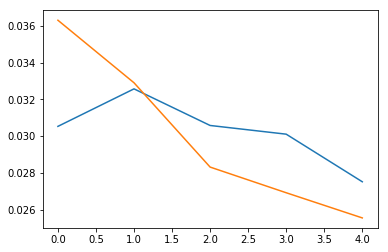

In [23]:
plt.plot(np.arange(0, 5), history.history['val_loss'], history.history['loss'])

## Exercise

1. Locate the IMDB code here: https://github.com/keras-team/keras/blob/master/examples/imdb_cnn_lstm.py
  * Study the IMDB dataset. What does it consist of?
2. Explain step by step what the model is doing
  * For each layer, write down: the input shape, what the layers actually does and the output shape
3. Build and train the model
  * Remember to extract the history of the model while you train it!
4. Extract the `'val_loss'` and `'loss'` from the history and plot them against each other